<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#--Reading-Image" data-toc-modified-id="--Reading-Image-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>- Reading Image</a></span></li><li><span><a href="#--Resizing-Image" data-toc-modified-id="--Resizing-Image-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>- Resizing Image</a></span></li><li><span><a href="#--Removing-Noise-from-image" data-toc-modified-id="--Removing-Noise-from-image-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>- Removing Noise from image</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Read-Image" data-toc-modified-id="Read-Image-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Read Image</a></span></li><li><span><a href="#Resize-Image" data-toc-modified-id="Resize-Image-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Resize Image</a></span></li><li><span><a href="#Remove-Noise" data-toc-modified-id="Remove-Noise-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>Remove Noise</a></span></li><li><span><a href="#Save-Image-For-Style-Transfer" data-toc-modified-id="Save-Image-For-Style-Transfer-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>Save Image For Style Transfer</a></span></li></ul></li></ul></li></ul></div>

# Data Preprocessing

### - Reading Image
### - Resizing Image
### - Removing Noise from image

### Import Libraries 

In [3]:
pip install opencv-python

  Using cached opencv_python-4.4.0.46-cp38-cp38-win_amd64.whl (33.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image  
import PIL  
%matplotlib inline

### Read Image 

Enter content and style image path for respective processing of image

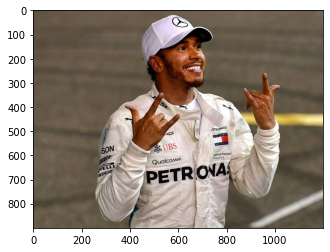

In [6]:
img_path = r'D:\Style-Transfer\Webscrape\dataset\images\content_images\players\lewis hamliton22.jpg'
img_arr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
plt.imshow(img_arr[...,::-1])    # cv keeps the images in BGR
plt.show()

### Resize Image 

Original size (900, 1200, 3)
RESIZED (512, 512, 3)


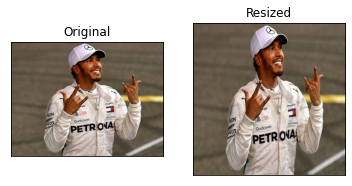

In [7]:
# Display two images
def display_two(a, b, title1 = "Original", title2 = "Resized"):
    plt.subplot(121), plt.imshow(a[...,::-1]), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b[...,::-1]), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
# Preprocessing
def processing(img):

    #print(img)
    print('Original size',img.shape)
    # setting dimensions of the resize
    height = 512
    width = 512
    dimension = (width, height)
    
    resized = cv2.resize(img,dimension,interpolation=cv2.INTER_AREA)
    # Checcking the size
    print("RESIZED", resized.shape)
    #print(img)
    # Visualization of original and resized image
    display_two(img,resized)
    
    #print(resized)
    return resized
    
resized = processing(img_arr)

### Remove Noise 

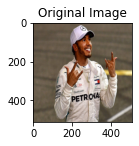

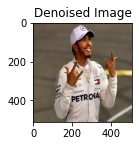

In [8]:
img = cv2.imread(img_path)
w = img.shape[0]
h = img.shape[1]
#print(w,h)

b,g,r = cv2.split(resized)           # get b,g,r

rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(resized,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r

rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img),plt.title('Original Image')
plt.show()
plt.subplot(212),plt.imshow(rgb_dst),plt.title('Denoised Image')
plt.show()

### Save Image For Style Transfer 

In [9]:
cv2.imwrite('../Style Transfer Images/VGG19_Adam/lewis hamliton22_processed.jpg', rgb_dst[...,::-1]) 

True